# ADM - HW5

#### Group #4 composed by Mario Dhimitri, Alessio Sampieri, Syed Hassan Abbas

## 1. Data Collection

Download the data you will be working on.

#### Distance graph

In [72]:
def distance_df():
    distance = pd.read_csv(r'C:\Users\aless\Desktop\HW5_ADM\data\distance.gr', header = None, sep = ' ')
    distance = distance.drop([0], axis=1)
    distance.columns = ['iniz', 'end', 'weight']
    return distance

#### Travel time graph

In [73]:
def time_df():
    time_ = pd.read_csv(r'C:\Users\aless\Desktop\HW5_ADM\data\time.gr', header = None, sep = ' ')
    time_ = time_.drop([0], axis=1)
    time_.columns = ['iniz', 'end', 'weight']
    return time_

#### Network distance graph

Download time.gr file and change its weight, from travel time to 1.

In [74]:
def net_dist():
    net_dist = pd.read_csv(r'C:\Users\aless\Desktop\HW5_ADM\data\time.gr', header = None, sep = ' ')
    net_dist = net_dist.drop([0, 3], axis=1)
    n = [1]*len(net_dist)
    net_dist['weight'] = n
    net_dist.columns = ['iniz', 'end', 'weight']
    return net_dist

#### Node information file

In [29]:
def position():
    position = pd.read_csv(r'C:\Users\aless\Desktop\HW5_ADM\data\position.co', header=None, sep=' ')
    position = position.drop([0], axis=1)
    position.columns = ['node', 'lat', 'long']
    return position

Load some packages

In [26]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections as cs
from collections import defaultdict
import random
import folium

In [27]:
import time

In [6]:
from IPython.display import HTML, display

## Functionality 1 - Find the Neighbours!

### 2. Implementation of the backend (Functionality 1)

Function below is the core of this functionalities.
This function visits the nodes within a certain threshold, once it has found one it calls itself (recursive function) and decreases the threshold through the difference.

In [108]:
def visiting(data, node, th, graph):
    for i in range(0, len(data)):
        if data.iloc[i, 0] == node:  # find node[i] in first dataframe column
            if data.iloc[i, 2] <= th: # check if its weight is at most threshold
                print('Node ok')
                graph.append([data.iloc[i, 0], data.iloc[i, 1], data.iloc[i, 2]]) # add the way

                # drop node visited
                data2 = data.drop(data.iniz[data.iniz == data.iloc[i, 0]].index.tolist())
                data2 = data2.drop(data.end[data.end == data.iloc[i, 0]].index.tolist())
                # RECURSIVE PART
                visiting(data2, data.iloc[i, 1], (th - data.iloc[i, 2]), graph)
    return graph

I now define the three different functions for each request. They only consider the file they need.

In [109]:
# TRAVEL TIME DISTANCE
def func_1_time(node, th):
    print('Func_1_time begin')
    s = time.time()
    data = time_df() # take data
    g = [] 
    graph = visiting(data, node, th, g)
    graph = pd.DataFrame(graph) # set with all possible way
    print(graph)
    graph.columns = ['iniz', 'end', 'weight']
    print('Backend finish whit time:', time.time()-s)

    return graph

# PHYSICAL DISTANCE 
def func_1_distance(node, th):

    print('Func_1_distance begin')
    s = time.time()
    data = distance_df()
    g = []
    graph = visiting(data, node, th, g)
    graph = pd.DataFrame(graph)
    print(graph)
    graph.columns = ['iniz', 'end', 'weight']
    print('Backend finish whit time:', time.time() - s)

    return graph

# NETWORK DISTANCE
def func_1_net(node, th):

    print('Func_1_net begin')
    s = time.time()
    data = net_dist()
    g = []
    graph = visiting(data, node, th, g)
    graph = pd.DataFrame(graph)
    print(graph)
    graph.columns = ['iniz', 'end', 'weight']
    print('Backend finish whit time:', time.time() - s)

    return graph

### 3. Implementation of the visualization (Functionality 1)

Define three functions that return the graph found in the backend, for each distance the colors have been changed.

In [110]:
# TRAVEL TIME DISTANCE
def frontend_f1_time(sol):
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)]) # dict whit coordinates for each node
    G = nx.from_pandas_edgelist(sol, 'iniz', 'end', 'weight')

    color_map = [] # list of colours
    tot_path = [] # list of all ways
    for node in G:
        color_map.append('green')
        tot_path.append(node)
    color_map[0] = 'red' # set color for first node
    nx.draw(G, posi, node_color=color_map, with_labels=True, edge_color='b')

    plt.show()

    # REAL MAP VISUALIZATION
    print('Real map start')
    locaz = ((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
             (posit.set_index('node')['lat'][tot_path[0]]) / 1000000)
    m = folium.Map(location=locaz, zoom_start=10,
                   tiles='openstreetmap')
    
    # add node at 'm' with colors
    for node in tot_path:
        folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                      (posit.set_index('node')['lat'][node]) / 1000000), radius=3,
                            line_color='#3186cc', fill_color='#FFFFFF', fill_opacity=0.7, fill=True).add_to(m)
    # color red for first node
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[0]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('Start: ' + str(tot_path[0]))).add_to(m)
    
   
    display(m)
    #m.save('frontend1_time.html')
    print('Real map end')
    

# NB. Comments for next function are equal to the previous one, so I took them off.
# PHYSICAL DISTANCE ####################################
def frontend_f1_distance(sol):
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)])
    G = nx.from_pandas_edgelist(sol, 'iniz', 'end', 'weight')

    color_map = []
    tot_path = []
    for node in G:
        color_map.append('green')
        tot_path.append(node)
    color_map[0] = 'b'
    nx.draw(G, posi, node_color=color_map, with_labels=True, edge_color='r')

    plt.show()

    # REAL MAP VISUALIZATION
    print('Real map start')
    locaz = ((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
             (posit.set_index('node')['lat'][tot_path[0]]) / 1000000)
    m = folium.Map(location=locaz, zoom_start=10,
                   tiles='openstreetmap')

    for node in tot_path:
        folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                      (posit.set_index('node')['lat'][node]) / 1000000), radius=3,
                            line_color='#3186cc', fill_color='#FFFFFF', fill_opacity=0.7, fill=True).add_to(m)
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[0]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('Start: ' + str(tot_path[0]))).add_to(m)
    display(m)
    #m.save('frontend1_physical.html')
    print('Real map end')
    

# NETWORK DISTANCE #################################
def frontend_f1_net(sol):
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)])
    G = nx.from_pandas_edgelist(sol, 'iniz', 'end', 'weight')

    color_map = []
    tot_path = []
    for node in G:
        color_map.append('r')
        tot_path.append(node)
    color_map[0] = 'b'
    nx.draw(G, posi, node_color=color_map, with_labels=True, edge_color='g')

    plt.show()

    # REAL MAP VISUALIZATION
    print('Real map start')
    locaz = ((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
             (posit.set_index('node')['lat'][tot_path[0]]) / 1000000)
    m = folium.Map(location=locaz, zoom_start=10,
                   tiles='openstreetmap')

    for node in tot_path:
        folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                      (posit.set_index('node')['lat'][node]) / 1000000), radius=3,
                            line_color='#3186cc', fill_color='#FFFFFF', fill_opacity=0.7, fill=True).add_to(m)
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[0]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('Start: ' + str(tot_path[0]))).add_to(m)
    display(m)
    #m.save('frontend1_network.html')
    print('Real map end')

##### Attention

1. Display() NOT WORKS in Internet Explorer!
2. In the .py files there is no 'display (m)' because it does not output anything, that line is modified by the following:

In [14]:
'''
m.save('frontend1.html') 
print('frontend1time.html saved')
'''

"\nm.save('frontend1time.html')\n    print('frontend1time.html saved')\n"

### Now I can define Functionality 1 entirely.

In [111]:
def func_1():

    node = int(input('Enter your node: '))

    print("\nChoose between the following weights:")
    print("1 - Time distance")
    print("2 - Physical distance")
    print("3 - Network distance")
    choice2 = int(input("Enter your choice: "))
    while choice2 not in [1, 2, 3]:
        print("Please, insert a valid choice!")
        choice2 = int(input("Enter your choice: "))

    th = int(input('Enter your threshold: '))

    if choice2 == 1:
        sol = func_1_time(node, th)
        frontend_f1_time(sol)

    if choice2 == 2:
        sol = func_1_distance(node, th)
        frontend_f1_distance(sol)

    if choice2 == 3:
        sol = func_1_net(node, th)
        frontend_f1_net(sol)

### Functionality 1 test

#### Travel time distance

Enter your node: 1

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 1
Enter your threshold: 4500
Func_1_time begin
Node ok
Node ok
Node ok
      0        1     2
0     1  1048577  1139
1     1     1803  1565
2  1803     2589   687
Backend finish whit time: 188.51427841186523


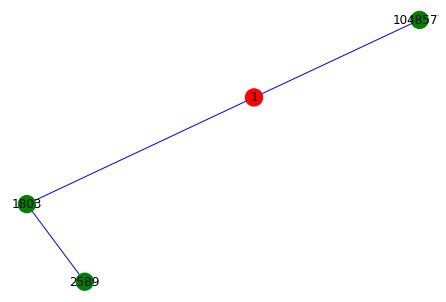

Real map start


Real map end


In [112]:
func_1()

#### Physical distance

Enter your node: 1

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 2
Enter your threshold: 6000
Func_1_distance begin
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
         0        1     2
0        1  1048577   456
1  1048577     1767  5061
2        1     1803   626
3     1803     1802  3605
4     1802  1050022   826
5  1050022     1799   295
6     1799  1050018   388
7     1803     2589   275
Backend finish whit time: 436.17550444602966


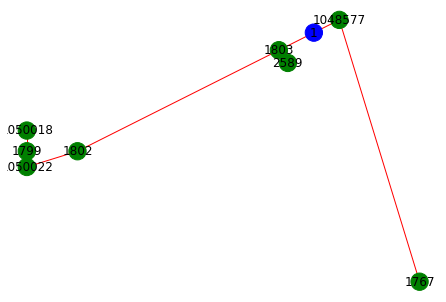

Real map start


Real map end


In [113]:
func_1()

#### Network distance

Enter your node: 1

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 3
Enter your threshold: 3
Func_1_net begin
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
Node ok
          0        1  2
0         1  1048577  1
1   1048577     1766  1
2      1766  1048579  1
3      1766  1049992  1
4   1048577     1767  1
5      1767  1049993  1
6      1767     1785  1
7         1     1803  1
8      1803     1802  1
9      1802  1050020  1
10     1802  1050022  1
11     1803     2589  1
Backend finish whit time: 665.1957514286041


C:\Users\aless\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


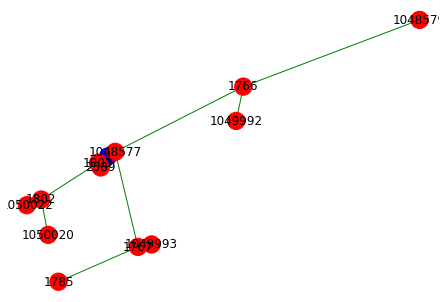

Real map start


Real map end


In [77]:
func_1()

## Functionality 2 - Find the smartest Network! 

 It takes in input:
 
 - a set of nodes _v = {v\_1, ..., v\_n}_
 - One of the following distances function: **t(x,y)**, **d(x,y)** or **network distance** (i.e. consider all edges to have weight equal to 1).

Implement an algorithm that returns the set of roads (edges) that enable the user to visit all the places. We want this set to be the ones whose sum of distances is minimum.

As a dummy example, a set of input could be {Colosseo, Piazza Venezia, Piazza del Popolo} and therefore the associated set of streets will be {Via dei Fori Imperiali, Via del Corso}.



### Backend and Visualization (Functionality 2)

In [8]:
#Assigning the functions to variables

position = position()
distance = distance_df()
time = time_df()
net_dist = net_dist()

In [9]:
class Vertex:
    def __init__(self, n):
        self.name = n
        self.neighbors = list()

        self.discovery = 0
        self.finish = 0
        self.color = 'black'

    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)
            self.neighbors.sort()

class Graph:
    vertices = {}
    time = 0
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False

    def add_edge(self, u, v):
        if u in self.vertices and v in self.vertices:
            for key, value in self.vertices.items():
                if key == u:
                    value.add_neighbor(v)
                if key == v:
                    value.add_neighbor(u)
            return True
        else:
            return False

    def print_graph(self):
        for key in sorted(list(self.vertices.keys())):
            print(key + str(self.vertices[key].neighbors) + "  " + str(self.vertices[key].discovery) + "/" + str(self.vertices[key].finish))

    def _dfs(self, vertex):
        global time
        vertex.color = 'red'
        vertex.discovery = time
        time += 1
        for v in vertex.neighbors:
            if self.vertices[v].color == 'black':
                self._dfs(self.vertices[v])
        vertex.color = 'blue'
        vertex.finish = time
        time += 1

    def dfs(self, vertex):
        global time
        time = 1
        self._dfs(vertex)



In [10]:
g = Graph()
# print(str(len(g.vertices)))
a = Vertex('A')
g.add_vertex(a)
g.add_vertex(Vertex('B'))
for i in range(ord('A'), ord('K')):
    g.add_vertex(Vertex(chr(i)))

edges = ['AB', 'AE', 'BF', 'CG', 'DE', 'DH', 'EH', 'FG', 'FI', 'FJ', 'GJ', 'HI']
for edge in edges:
    g.add_edge(edge[:1], edge[1:])

g.dfs(a)
g.print_graph()

A['B', 'E']  1/20
B['A', 'F']  2/19
C['G']  5/6
D['E', 'H']  12/15
E['A', 'D', 'H']  13/14
F['B', 'G', 'I', 'J']  3/18
G['C', 'F', 'J']  4/9
H['D', 'E', 'I']  11/16
I['F', 'H']  10/17
J['F', 'G']  7/8


## Functionality 3 - Shortest Ordered Route 

### 2. Implementation of the backend (Functionality 3)

You need to have a graph in a dictionary form.

In [81]:
class Graph():
    def __init__(func3):
        func3.edges = defaultdict(list)
        func3.weights = {}

    def add_edge(func3, from_node, to_node, weight):
        # edges are unidirected
        func3.edges[from_node].append(to_node)
        func3.weights[(from_node, to_node)] = weight
        

Function below is the core of this Functionality, it implements Dijkstra.
Based on some internet references. 

In [82]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    s = time.time()
    shortest_paths = {initial: (None, 0)}
    current_node = initial

    # set of visited nodes
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    # Work back through destinations in shortest path
    path = []

    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node

    # Reverse path
    path = path[::-1]

    print('Dijkstra time: ', time.time()-s)
    return path

I now define the three different functions for each request. They only consider the file they need.

In [83]:
# TRAVEL TIME DISTANCE
def func_3_time(node, route):
    print('Func_3_time begin')
    data = time_df()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()] # transform dataframe to tuples
    graph = Graph()
    for edge in edges:                            # and add edges
        graph.add_edge(*edge)

    print('Graph created')
    nodes = [node]
    for i in range(0, len(route)):
        nodes.append(route[i])
    
    # create a list composing by shortest path between node i and i+i
    trip = []
    for i in range(0, len(nodes) - 1):
        trip.append(dijsktra(graph, nodes[i], nodes[i + 1]))
    
    # create a dataframe with columns 'from','to'.. in this way I have all edge I need.
    build = []
    for i in range(0, len(trip)):
        for j in range(0, len(trip[i]) - 1):
            build.append([trip[i][j], trip[i][j + 1]])

    build = pd.DataFrame(build, columns=['iniz', 'end'])
    print('Backend finish')
    return build

# NB. Comments for next function are equal to the previous one, so I took them off.
#     I only change data to take.
# PHYSICAL DISTANCE
def func_3_distance(node, route):
    print('Func_3_distance begin')
    data = distance_df()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()]
    graph = Graph()
    for edge in edges:
        graph.add_edge(*edge)

    print('Graph created')
    nodes = [node]
    for i in range(0, len(route)):
        nodes.append(route[i])

    trip = []
    for i in range(0, len(nodes) - 1):
        trip.append(dijsktra(graph, nodes[i], nodes[i + 1]))

    build = []
    for i in range(0, len(trip)):
        for j in range(0, len(trip[i])-1):
            build.append([trip[i][j], trip[i][j+1]])

    build = pd.DataFrame(build, columns=['iniz', 'end'])
    print('Backend finish')
    return build


# NETWORK DISTANCE
def func_3_net(node, route):
    print('Func_3_network begin')
    data = net_dist()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()]
    graph = Graph()
    for edge in edges:
        graph.add_edge(*edge)

    print('Graph created')
    nodes = [node]
    for i in range(0, len(route)):
        nodes.append(route[i])

    trip = []
    for i in range(0, len(nodes) - 1):
        trip.append(dijsktra(graph, nodes[i], nodes[i + 1]))

    build = []
    for i in range(0, len(trip)):
        for j in range(0, len(trip[i])-1):
            build.append([trip[i][j], trip[i][j+1]])

    build = pd.DataFrame(build, columns=['iniz', 'end'])
    print('Backend finish')
    return build

### 3. Implementation of the visualization (Functionality 3)


Return the graph found in backend

In [88]:
def frontend_f3(build, nod, route):
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)]) # coord. for each node
    nodes = [nod]
    for i in range(0, len(route)):
        nodes.append(route[i])

    G = nx.from_pandas_edgelist(build, 'iniz', 'end')

    color_map = []
    tot_path = []
    lab = {} # dict containing node in route, I need this to have different colours.
    lab[nod] = nod
    for node in G:
        color_map.append('blue')
        tot_path.append(node)
        for k in range(0, len(route)):
            if node == route[k]:
                lab[node] = node
                color_map[-1] = 'green'

    color_map[0] = 'red'
    color_map[-1] = 'red'
    nx.draw(G, posi, node_color=color_map, with_labels=False)
    nx.draw_networkx_labels(G, posi, lab, font_size=16)
    plt.show()

    # REAL MAP VISUALIZATION: result avaible .html
    print('Real map start')
    locaz = ((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
             (posit.set_index('node')['lat'][tot_path[0]]) / 1000000)
    m = folium.Map(location=locaz, zoom_start=10,
                   tiles='openstreetmap')

    i = 1
    for node in tot_path:
        folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                      (posit.set_index('node')['lat'][node]) / 1000000), radius=3,
                            line_color='#3186cc', fill_color='#FFFFFF', fill_opacity=0.7, fill=True).add_to(m)
        for k in range(0, len(route)):
            # if node is in route then add a popup e change colour
            if node == route[k]:  
                folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                              (posit.set_index('node')['lat'][node]) / 1000000), radius=7,
                                    line_color='green', fill_color='green', fill_opacity=0.7, fill=True,
                                    popup=('Passing ' + str(i) + ': ' + str(node))).add_to(m)
                i += 1
    
    # colour red for first and last node, and popup
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[0]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('Start: ' + str(tot_path[0]))).add_to(m)
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[-1]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[-1]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('End: ' + str(tot_path[-1]))).add_to(m)
    display(m)
    #m.save('frontend3.html')
    print('Real map end')

### Now I can define Functionality 3 enterly.

In [85]:
def func_3():
    node = int(input('Enter your start node: '))

    route = list(map(int, input('Enter the nodes that you should visit: ').split()))

    print("\nChoose between the following weights:")
    print("1 - Time distance")
    print("2 - Physical distance")
    print("3 - Network distance")
    choice2 = int(input("Enter your choice: "))
    while choice2 not in [1, 2, 3]:
        print("Please, insert a valid choice!")
        choice2 = int(input("Enter your choice: "))

    if choice2 == 1:
        sol = func_3_time(node, route)
        frontend_f3(sol, node, route)

    if choice2 == 2:
        sol = func_3_distance(node, route)
        frontend_f3(sol, node, route)

    if choice2 == 3:
        sol = func_3_net(node, route)
        frontend_f3(sol, node, route)

### Functionality 3 test


#### Travel time distance

Enter your start node: 363
Enter the nodes that you should visit: 625 832 1004 1300

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 1
Func_3_time begin
Graph created
Dijkstra time:  0.7549769878387451
Dijkstra time:  0.03490781784057617
Dijkstra time:  0.0608370304107666
Dijkstra time:  3.8866002559661865
Backend finish


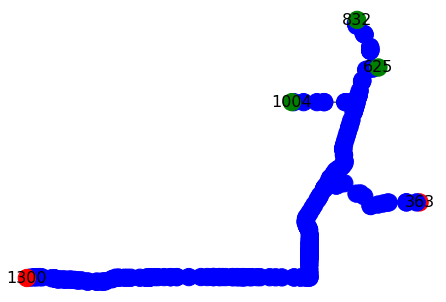

Real map start


Real map end


In [86]:
func_3()

#### Physical Distance

Enter your start node: 623
Enter the nodes that you should visit: 1782 2216 1932 3511

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 2
Func_3_distance begin
Graph created
Dijkstra time:  0.9394848346710205
Dijkstra time:  0.0438840389251709
Dijkstra time:  0.18350863456726074
Dijkstra time:  41.593810081481934
Backend finish


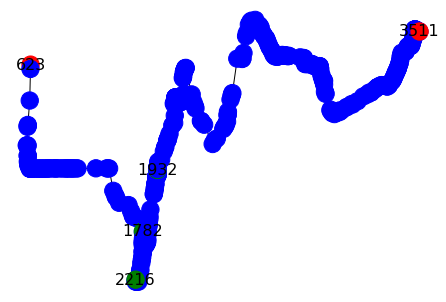

Real map start


Real map end


In [87]:
func_3()

#### Network distance

Enter your start node: 34
Enter the nodes that you should visit: 24 79 91 102

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 3
Func_3_network begin
Graph created
Dijkstra time:  0.012937068939208984
Dijkstra time:  0.03892874717712402
Dijkstra time:  0.0
Dijkstra time:  3.7400314807891846
Backend finish


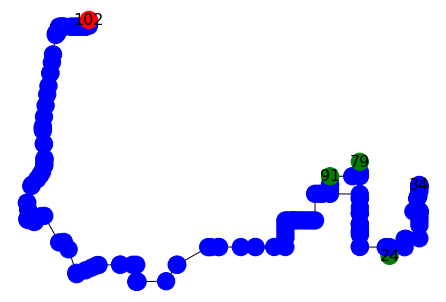

Real map start


Real map end


In [89]:
func_3()

## Functionality 4 - Shortest Route

### 2. Implementation of the backend (Functionality 4)

Like Functionality 3, I need to create a graph in a dictionary form.

In [91]:
class Graph():
    def __init__(func3):
        func3.edges = defaultdict(list)
        func3.weights = {}

    def add_edge(func3, from_node, to_node, weight):
        
        func3.edges[from_node].append(to_node)
        func3.weights[(from_node, to_node)] = weight

We have to define again Dijkstra and this time it returns optimal path and its weight.

In [92]:
def dijsktra(graph, initial, end):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    s = time.time()
    shortest_paths = {initial: (None, 0)}
    current_node = initial

    # set of visited nodes
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return 'Route not possible', np.inf
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    # Work back through destinations in shortest path
    path = []

    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node

    # Reverse path
    path = path[::-1]

    print('Dijkstra time: ', time.time()-s)
    return path, weight

We have a problem similar to TSP, therefore it is known that the problem cannot be solved optimally. For the solution I used an approximation called 2-OPT, which finds an approximate (local) minimum path. This approximation is based on some internet pseudo-codes.

In [93]:
def cost(cost_mat, route):
    #print(cost_mat)
    #print(route)
    return cost_mat[np.roll(route, 1), route].sum()  # shifts route array by 1 in order to look at pairs of cities


def two_opt(connect_mat, route):  # connect_mat is an adjency matrix with weight between each node of central path
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue  # changes nothing, skip then
                new_route = route[:]  # Creates a copy of route
                new_route[i:j] = route[j - 1:i - 1:-1]  # this is the 2-optSwap since j >= i we use -1
                if cost(connect_mat, new_route) < cost(connect_mat, route):
                    route = new_route  # change current route to best
                    improved = True

        return route

I now define the three different functions for each request. They only consider the file they need.

In [94]:
# TRAVEL TIME DISTANCE
def func_4_time(node, route):
    print('Func_4_time begin')
    data = time_df()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()]
    graph = Graph()
    for edge in edges:
        graph.add_edge(*edge)

    print('Graph created')
    
    # central node, I apply 2OPT at this list
    nodes = [] 
    for i in range(0, len(route) - 1):
        nodes.append(route[i])
    last = route[-1]
    return get_all(graph, nodes, node, last)

# NB. Comments for next function are equal to the previous one, so I took them off.
# PHYSICAL DISTANCE
def func_4_distance(node, route):
    print('Func_4_time begin')
    data = distance_df()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()]
    graph = Graph()
    for edge in edges:
        graph.add_edge(*edge)

    print('Graph created')
    nodes = []
    for i in range(0, len(route) - 1):
        nodes.append(route[i])
    last = route[-1]
    return get_all(graph, nodes, node, last)


# NETWORK DISTANCE
def func_4_net(node, route):
    print('Func_4_time begin')
    data = net_dist()

    subset = data[['iniz', 'end', 'weight']]
    edges = [tuple(x) for x in subset.to_numpy()]
    graph = Graph()
    for edge in edges:
        graph.add_edge(*edge)

    print('Graph created')
    nodes = []
    for i in range(0, len(route) - 1):
        nodes.append(route[i])
    last = route[-1]
    return get_all(graph, nodes, node, last)

All functions above return the solution of another function ('get_all') that returns: final graph, all nodes visited, graph of center nodes (without first and last)

In [95]:
def get_all(graph, nodes, node, last):
    
    # CREATE ADJACENCY MATRIX
    adj_matrix = pd.DataFrame(np.matrix(np.ones((len(nodes), len(nodes))) * np.inf)) # matrix of infinity
    path_matrix = [] # matrix of path between each node
    n = len(nodes)
    for i in range(0, n):
        path_m = []
        for j in range(0, n):
            if i == j:
                adj_matrix.iloc[i, j] = 0
                path_m.append(0) # 0 on diagonal

            else:
                path, adj = dijsktra(graph, nodes[i], nodes[j])
                adj_matrix.iloc[i, j] = adj
                path_m.append(path)

        path_matrix.append(path_m)

    adj_matrix = adj_matrix.to_numpy()
    nodes = np.array(nodes)

    # GET INDEX FOR SMARTEST CENTRAL PATH
    giro = {}
    for i in range(0, len(nodes)):
        giro.update({i: nodes[i]})

    route = random.sample(range(len(nodes)), len(nodes))
    best = two_opt(adj_matrix, route)  # passing my adjacency matrix

    # PATH
    central = []
    for i in range(0, len(nodes)):
        central.append(giro.get(best[i], ))
    
    # First to first od central
    central_path = [[node, central[0]]]
    
    # Central
    for i in range(0, len(central) - 1):
        central_path.append([central[i], central[i + 1]])
        
    # Last central to last    
    central_path.append([central[-1], last])
    central_path_df = pd.DataFrame(central_path, columns=['iniz', 'end'])
    
    # Same for simple path containing only route nodes and first
    tot_path = [node]
    for i in range(0, len(central)):
        tot_path.append(central[i])
    tot_path.append(last)

    # CREATE DATAFRAME WITH ALL NODES AND EDGES
    first_to_first, wei = dijsktra(graph, node, central[0])
    whole_node = [first_to_first]
    for i in range(0, len(best) - 1):
        whole_node.append(path_matrix[best[i]][best[i + 1]])
    last_to_last, wei2 = dijsktra(graph, central[-1], last)
    whole_node.append(last_to_last)

    build = []
    for i in range(0, len(whole_node)):
        for j in range(0, len(whole_node[i]) - 1):
            build.append([whole_node[i][j], whole_node[i][j + 1]])

    build = pd.DataFrame(build, columns=['iniz', 'end'])

    print('Backend finish')
    return central_path_df, tot_path, build

### 3. Implementation of the visualization (Functionality 4)



For this functionality I have implemented two graphs, one showing that the chosen path can actually be considered the shortest, the other examines all the nodes of the path.

In [96]:
def frontend_f4(build, route):
    print('Simply shortest path')
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)])

    G = nx.from_pandas_edgelist(build, 'iniz', 'end')

    color_map = []
    lab = {}

    for node in G:
        color_map.append('blue')

        for k in range(0, len(route)):
            if node == route[k]:
                lab[node] = node
                color_map[-1] = 'green'

    color_map[0] = 'red'
    color_map[-1] = 'red'
    nx.draw(G, posi, node_color=color_map, with_labels=False)
    nx.draw_networkx_labels(G, posi, lab, font_size=16)
    plt.show()

In [107]:
def frontend_f4_particular(build, tot_path, route):
    print('Particular shortest path')
    posit = position()
    posi = dict([(i, (a, b)) for i, a, b in zip(posit.node, posit.long, posit.lat)])

    G = nx.from_pandas_edgelist(build, 'iniz', 'end')

    color_map = []
    lab = {}
    tp = []

    for node in G:
        color_map.append('blue')
        tp.append(node)

        for k in range(0, len(tot_path)):
            if node == tot_path[k]:
                lab[node] = node
                color_map[-1] = 'green'

    color_map[0] = 'red'
    color_map[-1] = 'red'
    nx.draw(G, posi, node_color=color_map, with_labels=False)
    nx.draw_networkx_labels(G, posi, lab, font_size=16)
    plt.show()

    # REAL MAP VISUALIZATION
    print('Real map start')

    locaz = ((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
             (posit.set_index('node')['lat'][tot_path[0]]) / 1000000)
    m = folium.Map(location=locaz, zoom_start=10,
                   tiles='openstreetmap')

    i = 1
    for node in tp:
        folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                      (posit.set_index('node')['lat'][node]) / 1000000), radius=3,
                            line_color='#3186cc', fill_color='#FFFFFF', fill_opacity=0.7, fill=True).add_to(m)
        for k in range(0, len(route)):
            if node == route[k]:
                folium.CircleMarker(location=((posit.set_index('node')['long'][node]) / 1000000,
                                              (posit.set_index('node')['lat'][node]) / 1000000), radius=7,
                                    line_color='green', fill_color='green', fill_opacity=0.7, fill=True,
                                    popup=('Passing '+ str(i) + ': ' + str(node))).add_to(m)
                i += 1

    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[0]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[0]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('Start: ' + str(tot_path[0]))).add_to(m)
    folium.CircleMarker(location=((posit.set_index('node')['long'][tot_path[-1]]) / 1000000,
                                  (posit.set_index('node')['lat'][tot_path[-1]]) / 1000000), radius=7,
                        line_color='red', fill_color='red', fill_opacity=0.7, fill=True,
                        popup=('End: ' + str(tot_path[-1]))).add_to(m)
    display(m)
    # m.save('frontend4.html')
    print('Real map end')

### Now I can define Functionality 3 enterly.

In [98]:
def func_4():
    node = int(input('Enter your start node: '))

    route = list(map(int, input('Enter the nodes that you should visit: ').split()))

    print("\nChoose between the following weights:")
    print("1 - Time distance")
    print("2 - Physical distance")
    print("3 - Network distance")
    choice2 = int(input("Enter your choice: "))
    while choice2 not in [1, 2, 3]:
        print("Please, insert a valid choice!")
        choice2 = int(input("Enter your choice: "))

    if choice2 == 1:
        central_path_df, tot_path, build = func_4_time(node, route)
        frontend_f4(central_path_df, tot_path)
        frontend_f4_particular(build, tot_path, route)

    if choice2 == 2:
        central_path_df, tot_path, build = func_4_distance(node, route)
        frontend_f4(central_path_df, tot_path)
        frontend_f4_particular(build, tot_path, route)


    if choice2 == 3:
        central_path_df, tot_path, build = func_4_net(node, route)
        frontend_f4(central_path_df, tot_path)
        frontend_f4_particular(build, tot_path, route)

### Functionality 4 test

#### Travel time distance

Enter your start node: 34
Enter the nodes that you should visit: 43 52 67 92

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 1
Func_4_time begin
Graph created
Dijkstra time:  0.001994609832763672
Dijkstra time:  0.003991842269897461
Dijkstra time:  0.003990650177001953
Dijkstra time:  0.010968923568725586
Dijkstra time:  0.0029914379119873047
Dijkstra time:  0.005984306335449219
Dijkstra time:  0.018951416015625
Dijkstra time:  0.014957904815673828
Backend finish
Simply shortest path


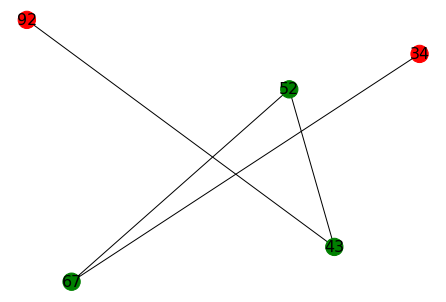

Particular shortest path


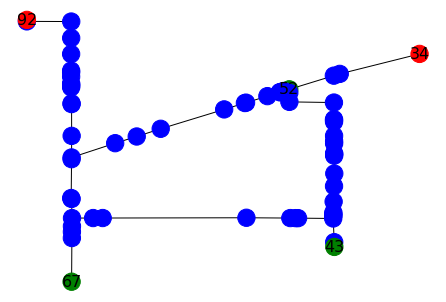

Real map start


Real map end


In [104]:
func_4()

####  Physical distance

Enter your start node: 422
Enter the nodes that you should visit: 523 803 634 790 599

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 2
Func_4_time begin
Graph created
Dijkstra time:  0.030956745147705078
Dijkstra time:  0.003991842269897461
Dijkstra time:  0.015999555587768555
Dijkstra time:  0.02692723274230957
Dijkstra time:  0.026968717575073242
Dijkstra time:  0.0069811344146728516
Dijkstra time:  0.004987239837646484
Dijkstra time:  0.03091740608215332
Dijkstra time:  0.016992568969726562
Dijkstra time:  0.02692723274230957
Dijkstra time:  0.029890060424804688
Dijkstra time:  0.045877933502197266
Dijkstra time:  0.4547755718231201
Dijkstra time:  0.031032562255859375
Backend finish
Simply shortest path


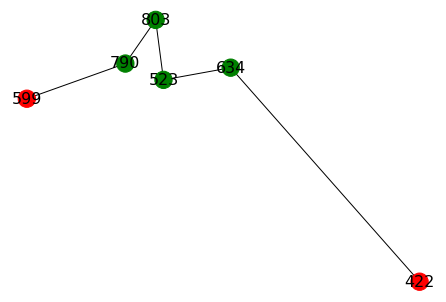

Particular shortest path


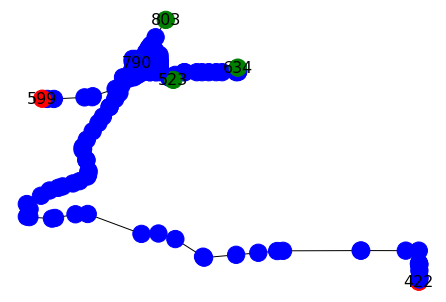

Real map start


Real map end


In [105]:
func_4()

#### Network distance

Enter your start node: 143
Enter the nodes that you should visit: 172 194 252 180 210

Choose between the following weights:
1 - Time distance
2 - Physical distance
3 - Network distance
Enter your choice: 3
Func_4_time begin
Graph created
Dijkstra time:  1.2706305980682373
Dijkstra time:  1.6636381149291992
Dijkstra time:  0.009928226470947266
Dijkstra time:  1.6346259117126465
Dijkstra time:  0.0
Dijkstra time:  0.6801795959472656
Dijkstra time:  1.0252575874328613
Dijkstra time:  0.0
Dijkstra time:  0.6067695617675781
Dijkstra time:  0.01897740364074707
Dijkstra time:  0.656257152557373
Dijkstra time:  0.6402549743652344
Dijkstra time:  0.8776669502258301
Dijkstra time:  3.7130353450775146
Backend finish
Simply shortest path


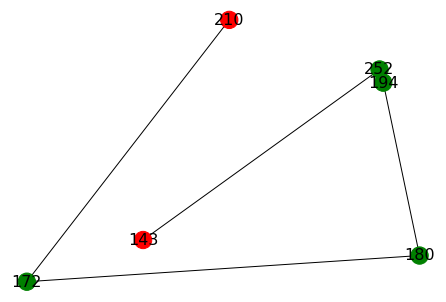

Particular shortest path


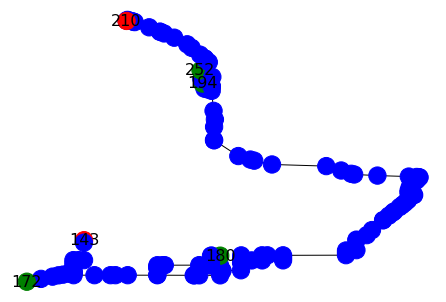

Real map start


Real map end


In [106]:
func_4()